In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# Do modelo a produção

O projeto realizado utiliza dados adquiridos de forma online para criar um detector de ursos classificados em grizzly (urso pardo), black (urso negro) e teddy bears (urso de pelúcia).

# Limpeza


In [3]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [4]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [5]:
d = 'images/grizzly.jpg'
download_url(ims[0], d)

Path('images/grizzly.jpg')

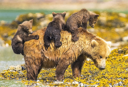

In [6]:
im = Image.open(d)
im.to_thumb(128,128)

Utilizando a função `download_images` da  fastai para realizar o download das URLs para cada tipo de urso e assim separar em pastas:

In [7]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [8]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

Verificando se a pasta possui as imagens baixadas:



In [9]:
fns = get_image_files(path)
fns

(#564) [Path('bears/teddy/67affd91-515a-4310-b5f0-a693d5ec1d2c.jpg'),Path('bears/teddy/aa69cfe2-89e1-447a-8e81-8f477604f516.jpg'),Path('bears/teddy/ed847de1-2ec9-4636-933f-6f6d96dada91.jpg'),Path('bears/teddy/f6ebc951-6839-4dff-b201-2c84b211d019.jpg'),Path('bears/teddy/0c7deee6-e7b4-4551-b0e1-3182023b3bad.jpg'),Path('bears/teddy/00ee7166-e96e-4272-8bca-ee5d80af92d8.jpg'),Path('bears/teddy/ea08c129-fa4c-4034-b05e-588f898d6ad3.jpg'),Path('bears/teddy/b2d74c90-4557-49a2-b95c-9bd92b2a2814.jpg'),Path('bears/teddy/02fc15cf-7e88-45fa-b723-242e0387a991.jpg'),Path('bears/teddy/91477177-123d-4e2a-8213-14bfbddebeac.jpg')...]

> j: I just love this about working in Jupyter notebooks! It's so easy to gradually build what I want, and check my work every step of the way. I make a _lot_ of mistakes, so this is really helpful to me...

Verificando se há imagens com erro:

In [10]:
failed = verify_images(fns)
failed

(#26) [Path('bears/teddy/cb66f6eb-6d07-4da3-b7a1-ca8b14b0314a.jpg'),Path('bears/teddy/7aee1be7-48c8-46e1-9c30-c9cbe4d8bd0b.jpg'),Path('bears/teddy/1da12e28-1ae3-423c-846e-0cdb544fb972.JPG'),Path('bears/teddy/775e986b-2a56-427f-9c21-84128519363b.jpg'),Path('bears/teddy/98474fcc-2f8a-48d3-bf4e-891ee6bfa707.JPG'),Path('bears/teddy/a14e3fe1-0c95-4d8c-a955-6c445a3ad86f.JPG'),Path('bears/teddy/c6804eaf-76b2-4bdc-a6ca-507dad777d40.jpg'),Path('bears/teddy/a7365bce-85d3-4f83-b04e-2febb6d179f9.png'),Path('bears/teddy/1d52a0c2-8bd3-473d-a26b-fe5a152145a5.JPG'),Path('bears/teddy/26dc0f4b-58c9-4bdd-98d4-e984a003f504.jpg')...]

Para remover as imagens com falhas utilizou-se `unlink`em cada uma delas:

In [11]:
failed.map(Path.unlink);

## De dados a DataLoaders

DataLoaders é uma classe que armazena qualquer objeto DataLoader e os torna disponiveis para treino e validação. Precisa-se informar o seguinte: 

* O tipo de dado utilizado;
* Como buscar a lista de itens;
* Como rotular os itens;
* Como criar o set de validação.


In [12]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Let's look at each of these arguments in turn. First we provide a tuple where we specify what types we want for the independent and dependent variables: 

```python
blocks=(ImageBlock, CategoryBlock)
```

A *variável independente* é aquela que utilizada para realizar as predições, enquanto que a *variável dependente* é o objetivo. No caso, as variaveis independentes são as imagens, e as dependentes são as categorias (tipos de ursos).

Precisa-se informar a fastai como buscar a lista dos arquivos salvos na pasta. Dessa forma, a função `get_image_files` recebe o caminho e retorna a lista com todas as imagens contidas naquele caminho:

```python
get_items=get_image_files
```

Com o intuito de dividir os dados em treino e validação, a fastai providencia a função a seguir. Assim, para que as listas que forem retornadas dos dados de treinos e validação sejam as mesmas ao rodar o notebook, utiliza-se o que se chama de *seed*:

```python
splitter=RandomSplitter(valid_pct=0.2, seed=42)
```

Normalmente a variável independendete é referida como `x` e a variável dependente como `y`. Dessa forma, diz-se a fastai a função para a criação dos rótulos no dataset: 

```python
get_y=parent_label
```

`parent_label`é a função que a fastai providencia para pegar o nome da pasta na qual o arquivo se encontra. Pois, cada imagem foi colocada em uma pasta com o tipo de urso especificado, assim tem-se os rótulos necessários.

As imagens encontram-se em diferentes tamanhos, resultando em um problema para o deep learning, afinal o modelo não é alimentado com uma imagem por vez e sim por um aglomerado de imagens (*mini-batch*). Para juntá-los em um grande array (normalmente chamado de *tensor*) que será enviado ao modelo, todas as imagens precisam estar com o mesmo tamanho. 

Assim, utiliza-se um transform o qual irá redimensionar as imagens para o mesmo tamanho. Utiliza-se então o transform `Resize`:

```python
item_tfms=Resize(128)
```

Este comando retornou um objeto `DataBlock`. Isso é como um *modelo* para criar um `DataLoaders`. Ainda precisa-se informar ao fastai a fonte real dos dados - neste caso, o caminho onde as imagens podem ser encontradas:

In [13]:
dls = bears.dataloaders(path)

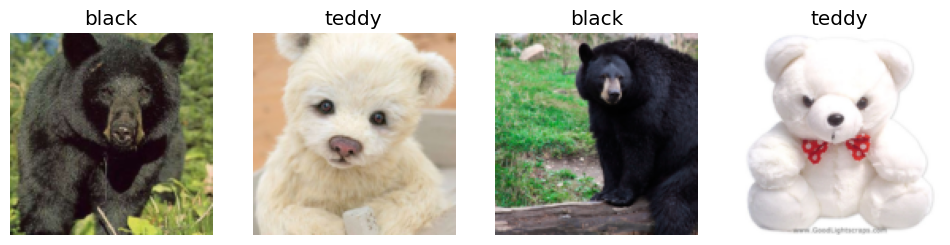

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

Por padrão o ```Resize``` corta a imagem para que caiba em um quadrado de tamanho informado, utilizando a altura e a largura completa. Isso pode resultar na perda de detalhes. Portanto, outra alternativa é pedir a fastai que coloque-se um padding na imagem com zeros, ou achatar/esticar:

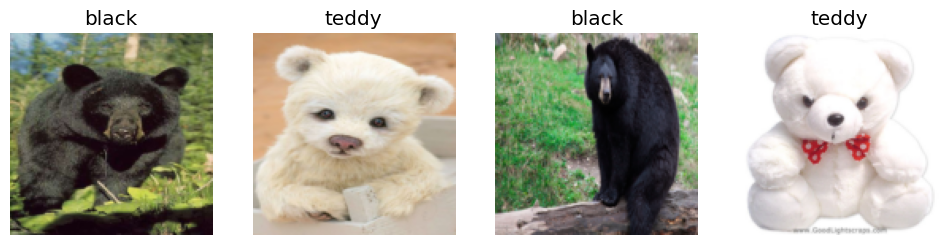

In [15]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

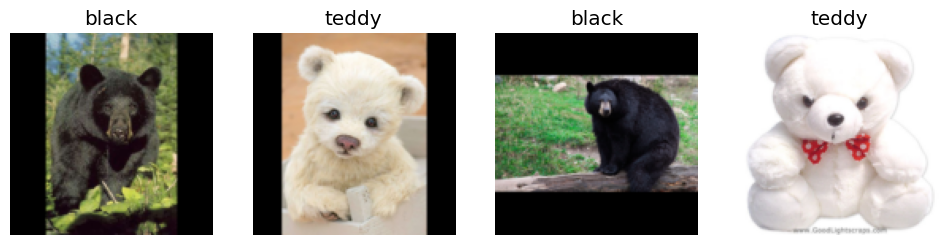

In [16]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

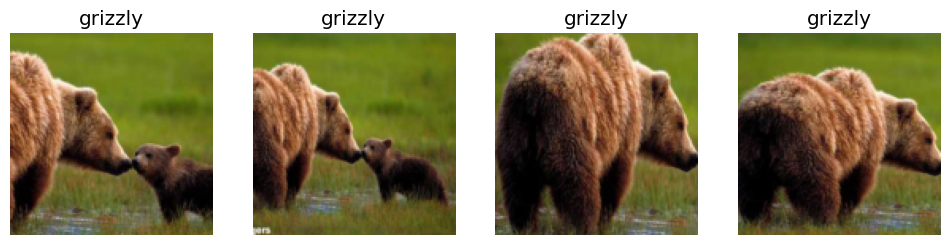

In [17]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

Data augmentation refere-se à criação de variações aleatórias nos dados de entrada, de forma que pareçam diferentes, mas sem alterar o significado dos dados. Exemplos de técnicas comuns de aumento de dados para imagens incluem rotação, espelhamento, deformação de perspectiva, alterações de brilho e alterações de contraste. 

Para imagens fotográficas naturais, como as utilizadas aqui, um conjunto padrão de aumentos de dados que descobriu-se funcionar muito bem é fornecido pela função `aug_transforms`. Como todas as imagens contendo o mesmo tamanho, pode-se aplicar esses aumentos a um lote inteiro delas usando a GPU, o que economizará muito tempo.

Para informar ao fastai que deseja-se utilizar essas transformações em um lote, usa-se o parâmetro `batch_tfms` (observe que não utilizou-se o `RandomResizedCrop` neste exemplo).

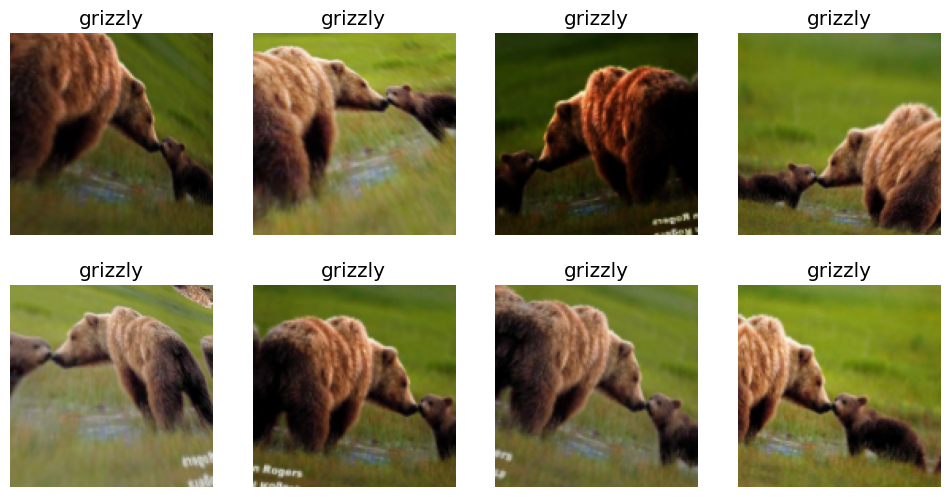

In [18]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Treinando o modelo e utilizando-o para limpeza de dados

In [19]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

Pode-se então criar o `Learner`e utilizar o fine-tune:

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 166MB/s]


Verifica se os erros que o modelo está cometendo são principalmente confundir ursos pardos com ursos de pelúcia (o que seria ruim para a segurança!), ou confundir ursos pardos com ursos-negros, ou algo mais. Para visualizar isso, cria-se uma matriz de confusão:

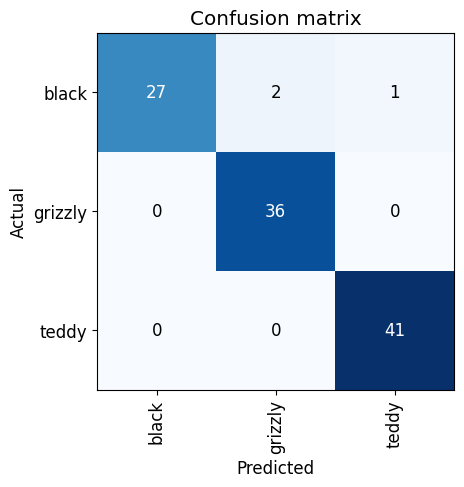

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

As linhas representam todos os ursos-negros, ursos pardos e ursinhos de pelúcia no conjunto de dados, respectivamente. As colunas representam as imagens que o modelo previu como ursos-negros, ursos pardos e ursinhos de pelúcia, respectivamente. Portanto, a diagonal da matriz mostra as imagens que foram classificadas corretamente, e as células fora da diagonal representam aquelas que foram classificadas incorretamente. 

Esta é uma das várias maneiras pelas quais o fastai permite a visualização dos resultados do modelo. É calculado usando o conjunto de validação. Com a codificação de cores, o objetivo é ter branco em todos os lugares, exceto na diagonal, onde deseja-se um azul escuro. O classificador de ursos não está cometendo muitos erros!

É útil ver exatamente onde os erros estão ocorrendo, para ver se eles são devidos a um problema no conjunto de dados (por exemplo, imagens que não são de ursos, ou estão rotuladas incorretamente, etc.) ou a um problema no modelo (talvez ele não esteja lidando com imagens tiradas com iluminação incomum ou de um ângulo diferente, etc.). Para fazer isso, pode-se classificar as imagens por sua perda.

A perda é um número maior se o modelo estiver incorreto (especialmente se também estiver confiante em sua resposta incorreta) ou se estiver correto, mas não confiante em sua resposta correta. Por enquanto, `plot_top_losses` mostra as imagens com a maior perda no conjunto de dados. 

Como o título da saída diz, cada imagem é rotulada com quatro coisas: previsão, real (rótulo alvo), perda e probabilidade. A probabilidade aqui é o nível de confiança, de zero a um, que o modelo atribuiu à sua previsão:

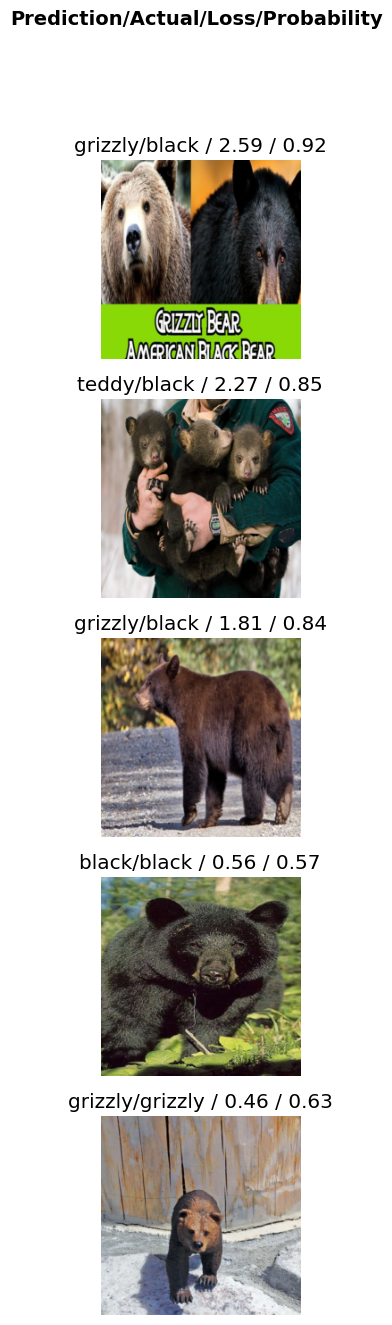

In [42]:
interp.plot_top_losses(5, nrows=5)

Esta saída mostra que a imagem com a maior perda é aquela que foi prevista como "grizzly" com alta confiança. No entanto, ela está rotulada (com base na busca de imagens) como "black". Dessa forma, percebe-se que o rótulo está incorreto! Provavelmente deve-se alterar seu rótulo para "grizzly".

A abordagem intuitiva para realizar a limpeza de dados é fazê-la antes de treinar um modelo. Mas, como neste caso, vê-se que um modelo pode realmente ajudar a encontrar problemas nos dados de forma mais rápida e fácil. Portanto, normalmente prefere-se treinar primeiro um modelo rápido e simples e, em seguida, usá-lo para nos ajudar na limpeza dos dados.

O fastai inclui uma interface gráfica útil para limpeza de dados chamada `ImageClassifierCleaner`, que permite escolher uma categoria e definir os conjuntos de treinamento e validação, além de visualizar as imagens com as maiores perdas (em ordem), juntamente com menus para selecionar imagens para remoção ou retificação dos rótulos:

In [23]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

## Tornando o modelo em uma aplicação online

### Utilizando o modelo para inferência

In [24]:
learn.export()

In [25]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [26]:
learn_inf = load_learner(path/'export.pkl')

In [27]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([4.1059e-04, 9.9953e-01, 5.8819e-05]))

In [28]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

### Criando um Notebook App a partir do modelo

Para usar o modelo em um aplicativo, pode-se simplesmente tratar o método `predict` como uma função regular. Portanto, criar um aplicativo a partir do modelo pode ser feito usando uma infinidade de estruturas e técnicas disponíveis para desenvolvedores de aplicativos.

No entanto, a maioria dos cientistas de dados não estão familiarizados com o mundo do desenvolvimento de aplicativos da web. Então, tenta-se usar algo que é conhecido até este ponto: é possível criar um aplicativo da web completo usando apenas notebooks Jupyter! As duas coisas necessárias para tornar isso possível são:

- IPython widgets (ipywidgets)
- Voilà

IPython widgets são componentes de GUI que reúnem funcionalidades de JavaScript e Python em um navegador da web, e podem ser criados e usados dentro de um notebook Jupyter. Por exemplo, o limpador de imagens que visto anteriormente é totalmente escrito com IPython widgets.

O Voilà é um sistema que permite que aplicativos compostos por IPython widgets estejam disponíveis para os usuários finais, sem que eles precisem usar o Jupyter. O Voilà aproveita o fato de que um notebook já é uma espécie de aplicativo da web, apenas um aplicativo da web bastante complexo que depende de outro aplicativo da web: o próprio Jupyter. Essencialmente, ele ajuda a converter automaticamente o aplicativo da web complexo feito implicitamente (o notebook) em um aplicativo da web mais simples e fácil de implantar, que funciona como um aplicativo da web normal, e não como um notebook.

Mas ainda tem-se a vantagem de desenvolver em um notebook, então, com o ipywidgets, pode-se construir a GUI passo a passo.

In [29]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [30]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [31]:
img = PILImage.create(btn_upload.data[-1])

In [32]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [33]:
pred,pred_idx,probs = learn_inf.predict(img)

In [34]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9995')

In [35]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [36]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [37]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [38]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])